In [3]:
import pandas as pd
import numpy as np

subpath = "distrib_experiment_y_original_k_fold/2025-02-20T21:51:58"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv', index_col=False)


In [4]:
data

,período,carga,apps,feature,método,nmae
0,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.097070
1,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.096573
2,128,FlashcrowdLoad,BothApps,DispFrames,RT,0.089713
3,128,FlashcrowdLoad,BothApps,DispFrames,RF,0.111593
4,64,FlashcrowdLoad,BothApps,DispFrames,RT,0.096481
5,64,FlashcrowdLoad,BothApps,DispFrames,RF,0.113528
6,32,FlashcrowdLoad,BothApps,DispFrames,RT,0.105604
7,32,FlashcrowdLoad,BothApps,DispFrames,RF,0.096752
8,16,FlashcrowdLoad,BothApps,DispFrames,RT,0.103791
9,16,FlashcrowdLoad,BothApps,DispFrames,RF,0.097527


In [5]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [6]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [7]:
group

,período,mean,std
0,8,12.0,2.0
1,16,12.0,2.0
2,32,11.0,2.0
3,64,12.0,1.0
4,128,11.0,2.0
5,256,13.0,4.0


In [8]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [9]:
total_table.set_index('período', inplace=True)

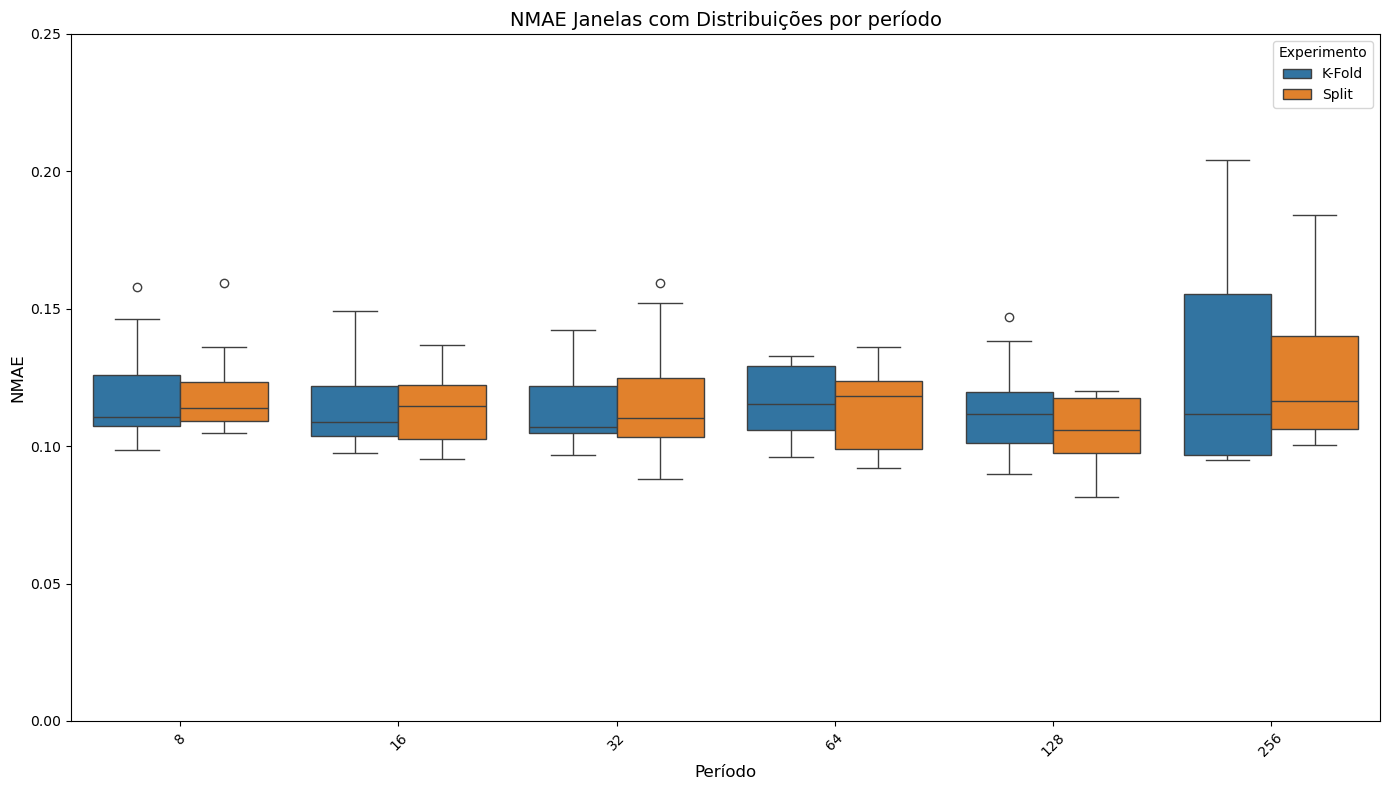

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reference_split = pd.read_csv(f'distrib_experiment_y_original/2025-01-05T17:06:02/minimal_with_univariate.csv', index_col=False)
#reference_tptt = pd.read_csv(f'distrib_tptt_experiment_y_original/2025-01-20T17:47:12/minimal_with_univariate.csv', index_col=False)

data['Experimento'] = 'K-Fold'
reference_split['Experimento'] = 'Split'
#reference_tptt['Experimento'] = 'TPTT'
data_combined = pd.concat([data, reference_split], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Experimento')

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(rotation=45)
plt.ylim((0, 0.25))

plt.tight_layout()

plt.show()

In [97]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [98]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [99]:
group_by_method

,período,método,mean,std
0,8,RF,10.0,2.0
1,8,RT,9.0,2.0
2,16,RF,11.0,2.0
3,16,RT,11.0,2.0
4,32,RF,12.0,3.0
5,32,RT,12.0,3.0
6,64,RF,12.0,1.0
7,64,RT,12.0,1.0
8,128,RF,13.0,5.0
9,128,RT,13.0,5.0


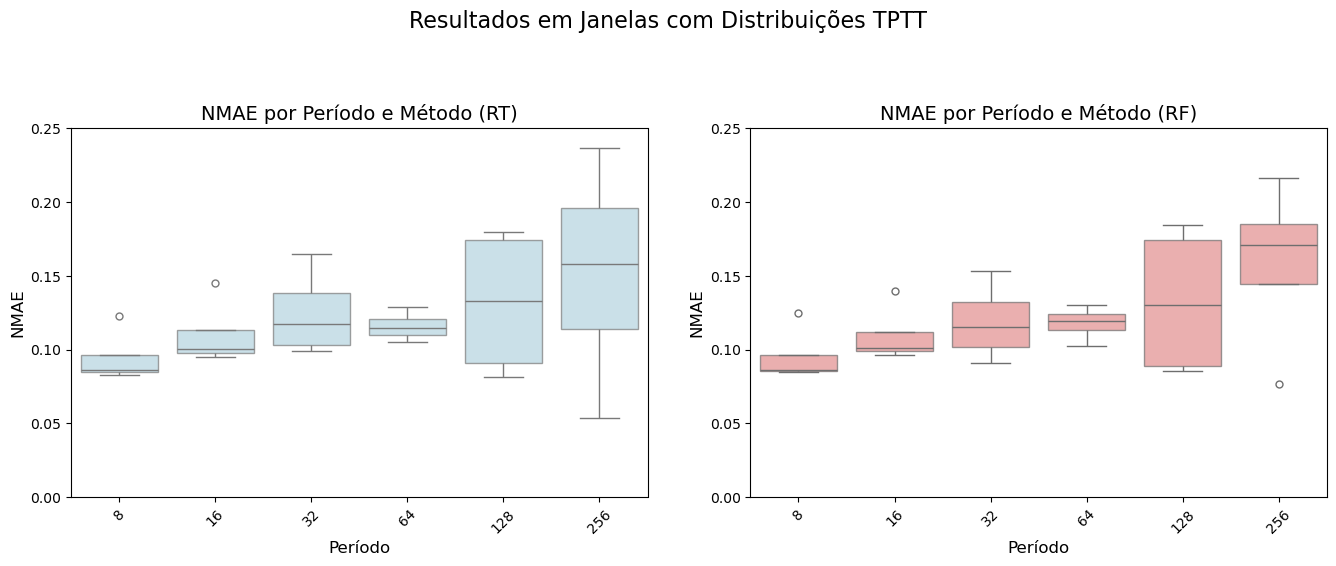

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


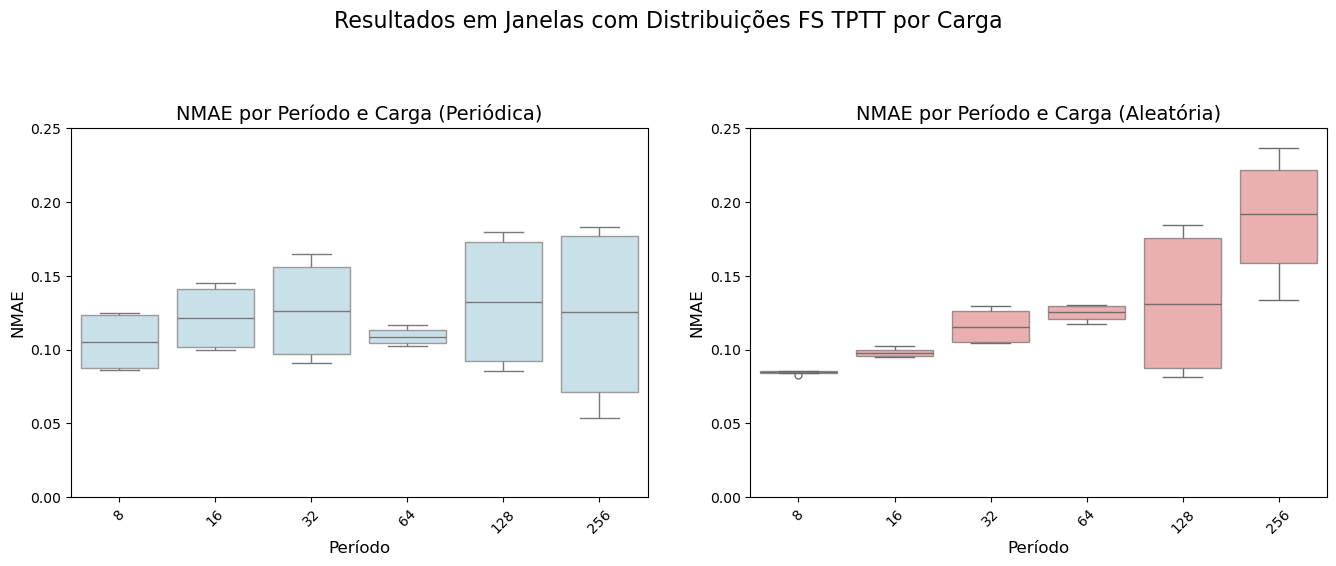

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'PeriodicLoad'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Carga (Periódica)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'FlashcrowdLoad'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Carga (Aleatória)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições FS TPTT por Carga", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
